<a href="https://colab.research.google.com/github/kKravtsova/data_and_python/blob/main/Data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kc_house_data_NaN.csv file contains information about houses, including:

* ID and date of the record
* Price
* Number of bedrooms and bathrooms
* Square footage of the living area and lot
* Number of floors
* Whether it's a waterfront property
* View quality
* Condition and grade of the house
* Square footage of above and basement areas
* Year built and year renovated
* Zipcode, latitude, and longitude
* Square footage of living area and lot for the nearest 15 neighbors

This data could be predicting house prices based on their features. This is a common challenge in real estate markets, where accurate price estimations are crucial for both sellers and buyers.

The real estate market is dynamic, and prices fluctuate based on numerous factors such as location, house size, amenities, and economic conditions. Predicting housing prices accurately can be complex, but is vital for making informed buying, selling, and investment decisions.



In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress
%matplotlib inline
file_name = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [76]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [77]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [78]:
df.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [84]:
bed_count = df.groupby(['bedrooms']).count()["date"]

In [85]:
bed_count

bedrooms
1.0      199
2.0     2760
3.0     9824
4.0     6882
5.0     1601
6.0      272
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: date, dtype: int64

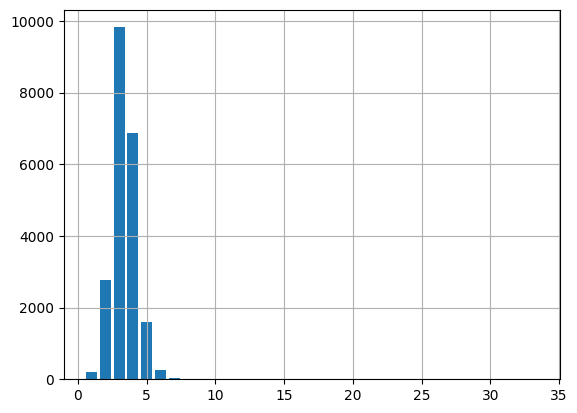

In [86]:
labels = bed_count.keys()
plt.bar(labels, bed_count)
plt.grid()
plt.show()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [88]:
df.dropna(subset = ["bedrooms"], inplace = True)
df.dropna(subset = ["bathrooms"], inplace = True)
df = df[df["bedrooms"] <= 8 ]

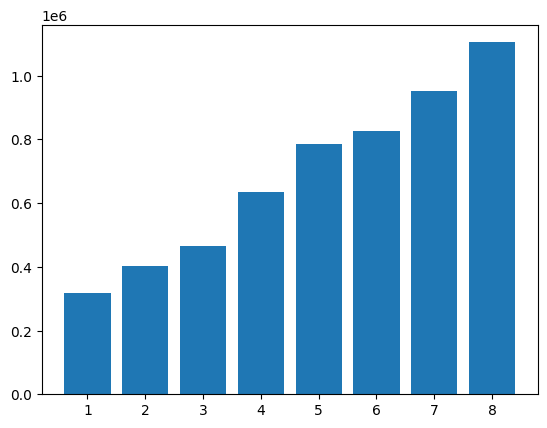

In [89]:
bed_mean = df["price"].groupby(df["bedrooms"]).mean()
labels = bed_mean.keys()
plt.bar(labels, bed_mean)
plt.show()

In [90]:
df.corr()

<ipython-input-90-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.317080,0.526353,0.701941,0.089992,0.256683,0.266557,0.397421,0.036204,0.667960,0.605427,0.323383,0.054516,0.126217,-0.053477,0.306664,0.022234,0.585228,0.082961
bedrooms,0.317080,1.000000,0.527393,0.594699,0.034629,0.182898,-0.006668,0.083426,0.024644,0.370235,0.494621,0.308226,0.166048,0.016631,-0.160864,-0.013228,0.139619,0.408759,0.033046
bathrooms,0.526353,0.527393,1.000000,0.755773,0.088798,0.502919,0.063983,0.188678,-0.126104,0.667299,0.686834,0.282757,0.509154,0.049956,-0.205722,0.023807,0.225941,0.571176,0.088797
sqft_living,0.701941,0.594699,0.755773,1.000000,0.173749,0.353617,0.104007,0.284889,-0.059127,0.763326,0.876461,0.434592,0.319281,0.054948,-0.200076,0.051825,0.241748,0.756933,0.184686
sqft_lot,0.089992,0.034629,0.088798,0.173749,1.000000,-0.004725,0.021623,0.074891,-0.008843,0.114758,0.184328,0.015569,0.052839,0.007785,-0.129564,-0.085461,0.230191,0.144781,0.718196
floors,0.256683,0.182898,0.502919,0.353617,-0.004725,1.000000,0.023797,0.029058,-0.263988,0.459040,0.523819,-0.246412,0.490345,0.006085,-0.059797,0.049024,0.126313,0.280235,-0.010610
waterfront,0.266557,-0.006668,0.063983,0.104007,0.021623,0.023797,1.000000,0.402027,0.016612,0.082910,0.072187,0.080687,-0.026217,0.093003,0.030287,-0.014283,-0.041933,0.086520,0.030770
view,0.397421,0.083426,0.188678,0.284889,0.074891,0.029058,0.402027,1.000000,0.046083,0.251693,0.167761,0.277072,-0.053997,0.104211,0.084849,0.005933,-0.078298,0.280632,0.072886
condition,0.036204,0.024644,-0.126104,-0.059127,-0.008843,-0.263988,0.016612,0.046083,1.000000,-0.146820,-0.158695,0.174217,-0.361962,-0.060584,0.002953,-0.015124,-0.105935,-0.092959,-0.003143
grade,0.667960,0.370235,0.667299,0.763326,0.114758,0.459040,0.082910,0.251693,-0.146820,1.000000,0.756427,0.168245,0.448237,0.014340,-0.185781,0.113605,0.200345,0.713887,0.121009


<ipython-input-91-e64e00ace048>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".1f", ax=ax)


<Axes: >

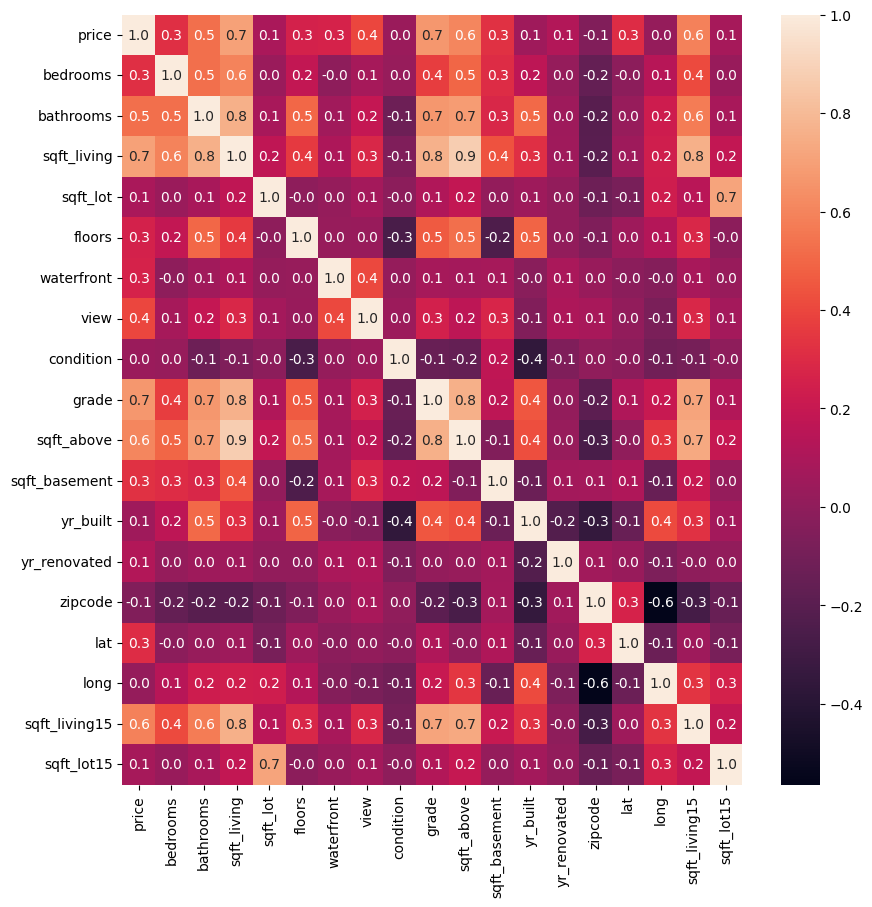

In [91]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".1f", ax=ax)

<Axes: xlabel='waterfront', ylabel='price'>

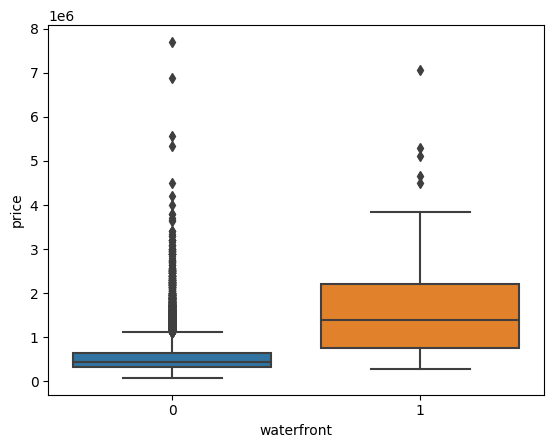

In [92]:
sns.boxplot(x=df["waterfront"], y=df["price"], data=df)

In [93]:
x = df["sqft_above"]
y = df["price"]
regression = linregress(x,y)
regression

LinregressResult(slope=268.5673452602282, intercept=59812.20130110474, rvalue=0.6054266400646647, pvalue=0.0, stderr=2.40317183706726, intercept_stderr=4735.2017579654885)

(0.0, 8081100.0)

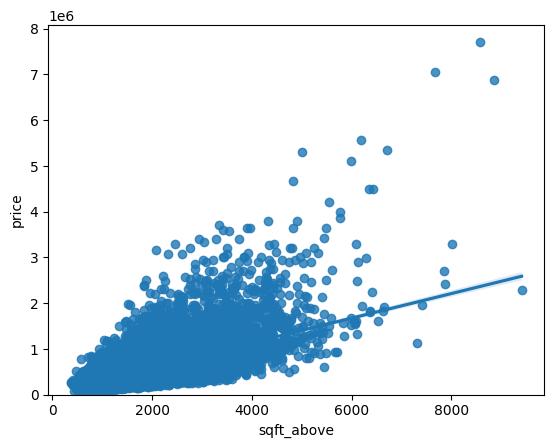

In [94]:
sns.regplot(x=df["sqft_above"],y=df["price"],data=df)
plt.ylim(0,)